In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; 

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay ,f1_score ,r2_score

from sklearn.svm import SVR

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('balling and roughness (2).xlsx', sheet_name = 'Sheet3')
df

,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,depth/thickness,length/width,width/depth,...,Weber number,"surface tension, N/m",spatter,VED,p,pi,spatter.1,m,effective power,ref
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,3.666667,5.413590,1.272727,...,0.762707,-237.920389,Spatter,37.004658,0.107712,243.608628,blank,Conduction Mode,102.319994,https://www.sciencedirect.com/science/article/...
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,3.066667,5.226992,1.413043,...,0.946459,-201.276391,Spatter,31.453959,0.091556,222.985317,blank,Conduction Mode,94.121044,NaN
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,3.000000,5.784335,1.166667,...,1.118781,-172.905271,Spatter,27.351269,0.079614,212.679234,blank,Conduction Mode,86.934645,NaN
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2.266667,5.152247,1.544118,...,1.273442,-150.448638,Spatter,24.195353,0.070427,201.928468,blank,Conduction Mode,80.649475,NaN
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2.400000,4.570885,1.458333,...,1.405504,-132.335280,Spatter,21.692386,0.063142,197.160224,blank,Conduction Mode,75.139529,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,4.023119,2.422176,1.465624,...,0.007957,-620.499381,no spatter,176.928521,0.686667,1123.165659,blank,Transition Mode,349.341321,NaN
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,3.469848,2.444694,1.554387,...,0.011478,-552.006536,no spatter,141.542817,0.549333,947.743444,blank,Transition Mode,347.689251,NaN
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,3.214217,2.487660,1.551659,...,0.015553,-499.215539,no spatter,117.952347,0.457778,817.866562,blank,Transition Mode,344.664948,NaN
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,3.056950,2.537594,1.521126,...,0.020133,-456.050759,no spatter,101.102012,0.392381,710.030117,blank,Conduction Mode,340.301603,NaN


In [3]:
# Assuming df is your DataFrame
columns_to_delete = ['ref',
                     'surface temperature T_s , K', 'surface tension, N/m','Peak temp. , K','recoil pressure , pa', 'Unnamed: 20','spatter' ,'p','spatter.1']  # List of columns to delete



# Deleting the specified columns
df1 = df.drop(columns=columns_to_delete, inplace=False)
df1.shape

(301, 26)

In [4]:
# Assuming df is your DataFrame and 'melt pool shape' is the column you want to replace values in

# Define the mapping of values to be replaced
replacement_map = {'LOF': 0, 'keyhole': 1, 'Desired': 2, 'balling': 3}

# Replace values in the 'melt pool shape' column using the mapping
df1['meltpool shape'] = df1['meltpool shape'].replace(replacement_map)

# Display the DataFrame after replacement
print("DataFrame after replacing values in 'melt pool shape' column:")
df1

DataFrame after replacing values in 'melt pool shape' column:


,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,depth/thickness,length/width,width/depth,...,surface tension / spot size,normalized enthalpy,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,m,effective power
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,3.666667,5.413590,1.272727,...,27777.777780,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,Conduction Mode,102.319994
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,3.066667,5.226992,1.413043,...,27777.777780,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,222.985317,Conduction Mode,94.121044
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,3.000000,5.784335,1.166667,...,27777.777780,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,212.679234,Conduction Mode,86.934645
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2.266667,5.152247,1.544118,...,27777.777780,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,201.928468,Conduction Mode,80.649475
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2.400000,4.570885,1.458333,...,27777.777780,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,197.160224,Conduction Mode,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,4.023119,2.422176,1.465624,...,8333.333333,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,1123.165659,Transition Mode,349.341321
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,3.469848,2.444694,1.554387,...,8333.333333,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,947.743444,Transition Mode,347.689251
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,3.214217,2.487660,1.551659,...,8333.333333,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,817.866562,Transition Mode,344.664948
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,3.056950,2.537594,1.521126,...,8333.333333,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,710.030117,Conduction Mode,340.301603


In [5]:
# Assuming df is your DataFrame and 'melt pool shape' is the column you want to replace values in

# Define the mapping of values to be replaced
replacement_map = {'Conduction Mode': 0, 'Transition Mode': 1, 'Keyhole Mode': 2}

# Replace values in the 'melt pool shape' column using the mapping
df1['m'] = df1['m'].replace(replacement_map)

# Display the DataFrame after replacement
print("DataFrame after replacing values in 'm' column:")
df1

DataFrame after replacing values in 'm' column:


,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,depth/thickness,length/width,width/depth,...,surface tension / spot size,normalized enthalpy,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,m,effective power
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,3.666667,5.413590,1.272727,...,27777.777780,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,0,102.319994
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,3.066667,5.226992,1.413043,...,27777.777780,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,222.985317,0,94.121044
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,3.000000,5.784335,1.166667,...,27777.777780,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,212.679234,0,86.934645
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2.266667,5.152247,1.544118,...,27777.777780,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,201.928468,0,80.649475
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,2.400000,4.570885,1.458333,...,27777.777780,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,197.160224,0,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,4.023119,2.422176,1.465624,...,8333.333333,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,1123.165659,1,349.341321
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,3.469848,2.444694,1.554387,...,8333.333333,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,947.743444,1,347.689251
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,3.214217,2.487660,1.551659,...,8333.333333,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,817.866562,1,344.664948
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,3.056950,2.537594,1.521126,...,8333.333333,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,710.030117,0,340.301603


In [6]:
columns_to_delete = ['surface tension / spot size' ,'depth/thickness',	'length/width' ,	'width/depth']  # List of columns to delete



# Deleting the specified columns
df2 = df1.drop(columns=columns_to_delete, inplace=False)
df2

,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,density kg/m^3,...,"surface tension force , N",normalized enthalpy,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,m,effective power
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,0,0.511600,7800,...,0.002374,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,0,102.319994
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,0,0.470605,7800,...,0.002134,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,222.985317,0,94.121044
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,0,0.434673,7800,...,0.001894,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,212.679234,0,86.934645
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2,0.403247,7800,...,0.001701,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,201.928468,0,80.649475
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,0,0.375698,7800,...,0.001524,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,197.160224,0,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,0,0.698683,7800,...,0.012405,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,1123.165659,1,349.341321
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,2,0.695379,7800,...,0.011431,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,947.743444,1,347.689251
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,2,0.689330,7800,...,0.010718,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,817.866562,1,344.664948
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,2,0.680603,7800,...,0.010153,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,710.030117,0,340.301603


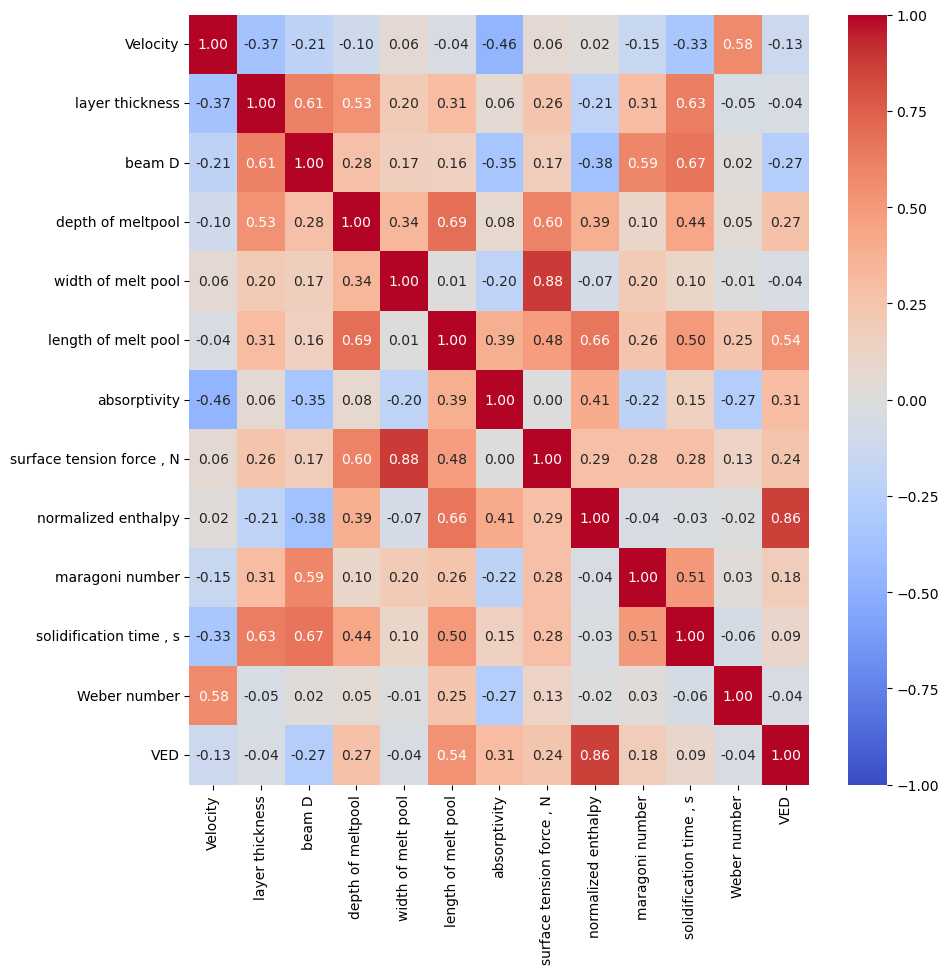

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Define the list of features (independent variables) and the target variable
features = ['Velocity', 'layer thickness', 'beam D',  'depth of meltpool',	'width of melt pool',	'length of melt pool'
            , 'absorptivity', 'surface tension force , N', 
            'normalized enthalpy', 'maragoni number', 
            'solidification time , s', 'Weber number', 'VED']
# target_variable = 'width of melt pool'  # Replace 'target_variable' with your actual target variable

# Calculate the pairwise correlation matrix
correlation_matrix = df2[features].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# Plot the heatmap of the correlation matrix


# Save the figure
plt.savefig('correlation_heatmap.png', bbox_inches='tight')



In [8]:
df2

,Power,Velocity,layer thickness,beam D,depth of meltpool,width of melt pool,length of melt pool,meltpool shape,absorptivity,density kg/m^3,...,"surface tension force , N",normalized enthalpy,maragoni number,aspect ratio length/depth,"solidification time , s",Weber number,VED,pi,m,effective power
0,200,850.0,30.0,90.0,110.000000,140.000000,757.902572,0,0.511600,7800,...,0.002374,8.762277,484.848485,6.890023,0.891650,0.762707,37.004658,243.608628,0,102.319994
1,200,1000.0,30.0,90.0,92.000000,130.000000,679.508923,0,0.470605,7800,...,0.002134,7.431092,484.848485,7.385967,0.679509,0.946459,31.453959,222.985317,0,94.121044
2,200,1150.0,30.0,90.0,90.000000,105.000000,607.355145,0,0.434673,7800,...,0.001894,6.400441,484.848485,6.748390,0.528135,1.118781,27.351269,212.679234,0,86.934645
3,200,1300.0,30.0,90.0,68.000000,105.000000,540.985910,2,0.403247,7800,...,0.001701,5.584648,484.848485,7.955675,0.416143,1.273442,24.195353,201.928468,0,80.649475
4,200,1450.0,30.0,90.0,72.000000,105.000000,479.942895,0,0.375698,7800,...,0.001524,4.926635,484.848485,6.665874,0.330995,1.405504,21.692386,197.160224,0,75.139529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,500,40.0,250.0,300.0,1005.779644,1474.095190,3570.517737,0,0.698683,7800,...,0.012405,22.660410,2090.000000,3.550000,89.262943,0.007957,176.928521,1123.165659,1,349.341321
297,500,50.0,250.0,300.0,867.461958,1348.371226,3296.355442,2,0.695379,7800,...,0.011431,20.172237,1840.000000,3.800000,65.927109,0.011478,141.542817,947.743444,1,347.689251
298,500,60.0,250.0,300.0,803.554262,1246.842385,3101.719450,2,0.689330,7800,...,0.010718,18.254473,1630.000000,3.860000,51.695324,0.015553,117.952347,817.866562,1,344.664948
299,500,70.0,250.0,300.0,764.237400,1162.501235,2949.956363,2,0.680603,7800,...,0.010153,16.686405,1430.000000,3.860000,42.142234,0.020133,101.102012,710.030117,0,340.301603


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [10]:
import pandas as pd

def detect_outliers_zscore_all(df2, num_stds=3):
  """
  This function detects outliers based on z-scores within a specified number of standard deviations for all numerical columns in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      num_stds (int, optional): The number of standard deviations to consider outliers. Defaults to 3.

  Returns:
      pandas.DataFrame: A DataFrame with columns indicating outliers (True) or inliers (False) for each numerical column.
      pandas.Index: The indices of rows containing outliers in any column.
  """
  outliers_df2 = pd.DataFrame(index=df2.index)  # Create an empty DataFrame for outliers
  outlier_indices = []  # Initialize a list to store outlier row indices
  for col in df2.select_dtypes(include=[np.number]):  # Iterate through numerical columns
    outliers = abs(df2[col] - df2[col].mean()) / df2[col].std() > num_stds
    outliers_df2[f'outliers_{col}'] = outliers  # Add a column named 'outliers_{col}' with outlier flags
    outlier_indices.extend(outliers[outliers].index)  # Add outlier indices to the list
  return outliers_df2, pd.Index(outlier_indices)  # Return outlier flags DataFrame and outlier indices

# Assuming 'filtered_df2' is your prepared DataFrame and 'threshold' is defined

# Calculate z-scores and identify outlier indices
outliers_df2, outlier_indices_zscore = detect_outliers_zscore_all(df2.copy())

# **Important: Consider if removing outliers is the best approach**
# (See previous discussion about potential drawbacks of removing outliers)

# If you decide to remove outliers:
# Drop the rows corresponding to the outlier indices
df3 = df2.drop(outlier_indices_zscore)

# Display the cleaned DataFrame (optional)
print("DataFrame after removing outliers detected by z-score method:")
print(df3.shape)


DataFrame after removing outliers detected by z-score method:
(244, 22)


In [11]:
df3 = df3.dropna()

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'filtered_df_cleaned' is your cleaned DataFrame containing the data
# Assuming 'X' contains features and 'y_width' contains the target variable 'width of melt pool'

# Split the dataset into features (X) and the target variable (y_width)
# X = df3.drop(columns=['depth of meltpool', 'width of melt pool', 'length of melt pool','meltpool shape','m','absorptivity','pi','Power','density kg/m^3',	'Weber number','conductivity w/m.k',	'specific heat J/kg.k'])  # Features excluding the target variable
y_width = df3['width of melt pool']  # Target variable
y_depth = df3['depth of meltpool']
y_length = df3['length of melt pool']

In [13]:
X = df3.drop(columns=['depth of meltpool', 'width of melt pool', 'length of melt pool','meltpool shape','m','absorptivity','pi','density kg/m^3',	'Weber number','conductivity w/m.k','layer thickness',	'beam D',	'specific heat J/kg.k',	'surface tension force , N',	'normalized enthalpy',	'maragoni number',	'aspect ratio length/depth',	'solidification time , s',	'VED',	'effective power'])

In [14]:
X

,Power,Velocity
0,200,850.0
1,200,1000.0
2,200,1150.0
3,200,1300.0
4,200,1450.0
...,...,...
276,225,140.0
277,225,170.0
278,225,200.0
279,225,290.0


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets for width prediction
X_train_width, X_test_width, y_width_train, y_width_test = train_test_split(X_scaled, y_width, test_size=0.25, random_state=42)

# Split the dataset into training and testing sets for depth prediction
X_train_depth, X_test_depth, y_depth_train, y_depth_test = train_test_split(X_scaled, y_depth, test_size=0.25, random_state=42)

# Split the dataset into training and testing sets for length prediction
X_train_length, X_test_length, y_length_train, y_length_test = train_test_split(X_scaled, y_length, test_size=0.25, random_state=42)

# Define the KNN regressor
knn = KNeighborsRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Function to train and evaluate the model
def train_and_evaluate(X_train, X_test, y_train, y_test, param_grid):
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get best hyperparameters
    best_params = grid_search.best_params_
    
    # Predict
    y_pred = grid_search.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    
    return best_params, rmse, r2

# Train and evaluate for width prediction
best_params_width, rmse_width, r2_width = train_and_evaluate(X_train_width, X_test_width, y_width_train, y_width_test, param_grid)
print("Best parameters for width prediction:", best_params_width)
print("RMSE for width prediction:", rmse_width)
print("R-squared for width prediction:", r2_width)

# Train and evaluate for depth prediction
best_params_depth, rmse_depth, r2_depth = train_and_evaluate(X_train_depth, X_test_depth, y_depth_train, y_depth_test, param_grid)
print("\nBest parameters for depth prediction:", best_params_depth)
print("RMSE for depth prediction:", rmse_depth)
print("R-squared for depth prediction:", r2_depth)

# Train and evaluate for length prediction
best_params_length, rmse_length, r2_length = train_and_evaluate(X_train_length, X_test_length, y_length_train, y_length_test, param_grid)
print("\nBest parameters for length prediction:", best_params_length)
print("RMSE for length prediction:", rmse_length)
print("R-squared for length prediction:", r2_length)


Best parameters for width prediction: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
RMSE for width prediction: 83.44141307545704
R-squared for width prediction: 0.5478825327358716

Best parameters for depth prediction: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
RMSE for depth prediction: 106.07612546423756
R-squared for depth prediction: 0.6670761392817548

Best parameters for length prediction: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
RMSE for length prediction: 193.10636332107885
R-squared for length prediction: 0.9348265487084995


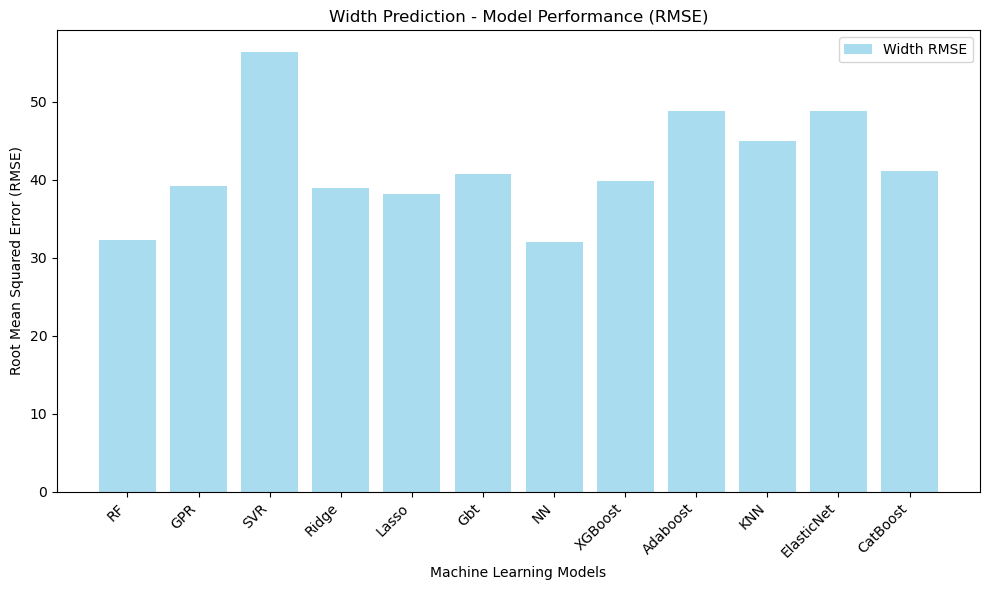

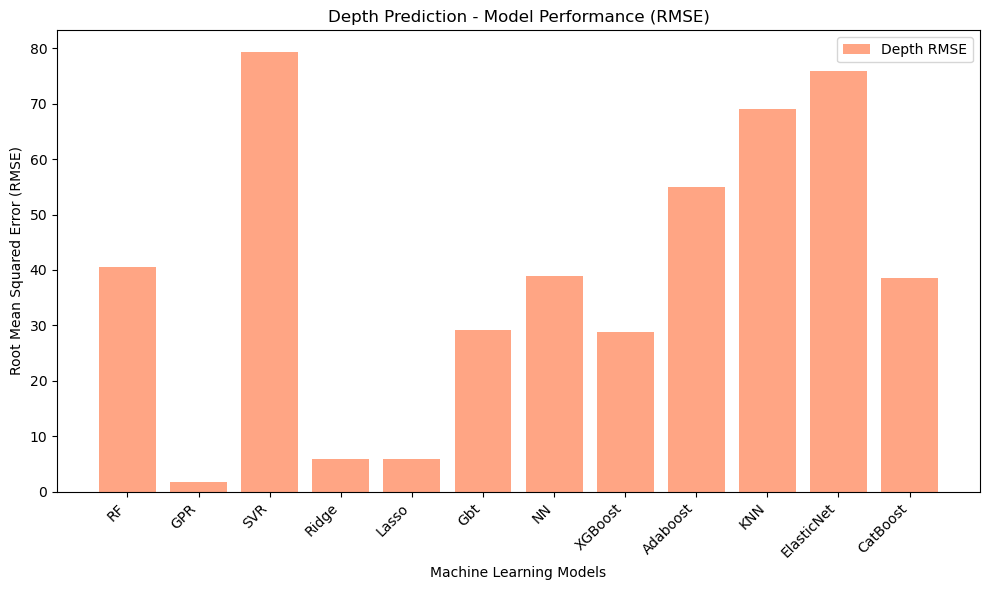

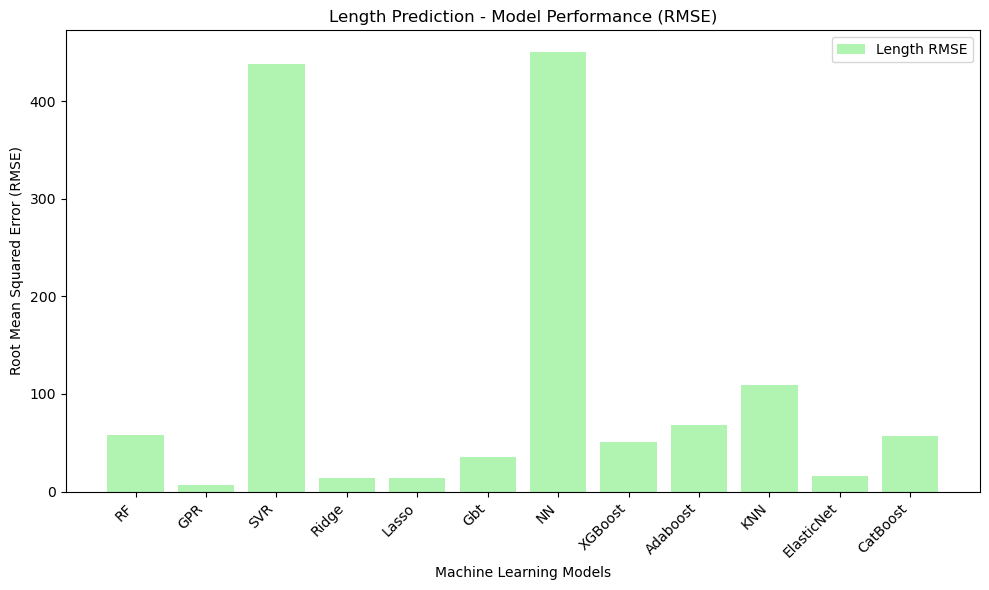

In [16]:
import matplotlib.pyplot as plt

# Data from your table
models = ['RF', 'GPR', 'SVR', 'Ridge', 'Lasso', 'Gbt', 'NN', 'XGBoost', 'Adaboost', 'KNN', 'ElasticNet', 'CatBoost']
width_rmse = [32.27, 39.17, 56.35, 38.96, 38.20, 40.75, 32.00, 39.88, 48.76, 45.00, 48.76, 41.07]
width_r2 = [0.89, 0.93, 0.79, 0.97, 0.97, 0.89, 0.88, 0.89, 0.84, 0.86, 0.84, 0.89]
depth_rmse = [40.51, 1.72, 79.31, 5.90, 5.90, 29.19, 39.00, 28.85, 54.96, 69.13, 75.97, 38.55]
depth_r2 = [0.96, 0.97, 0.81, 0.82, 0.82, 0.97, 0.82, 0.97, 0.91, 0.85, 0.82, 0.95]
length_rmse = [58.30, 7.14, 438.04, 13.80, 13.84, 35.62, 450.00, 51.01, 67.92, 109.32, 15.75, 56.70]
length_r2 = [0.99, 0.99, 0.66, 0.99, 0.99, 0.97, 0.78, 0.97, 0.99, 0.97, 0.99, 0.99]

# Create separate figures for each metric (RMSE, R²)
plt.figure(figsize=(10, 6))

# Plot for Width RMSE
plt.bar(models, width_rmse, color='skyblue', alpha=0.7, label='Width RMSE')
plt.xlabel('Machine Learning Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Width Prediction - Model Performance (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plot for Depth RMSE (new figure)
plt.figure(figsize=(10, 6))
plt.bar(models, depth_rmse, color='coral', alpha=0.7, label='Depth RMSE')
plt.xlabel('Machine Learning Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Depth Prediction - Model Performance (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plot for Length RMSE (new figure)
plt.figure(figsize=(10, 6))
plt.bar(models, length_rmse, color='lightgreen', alpha=0.7, label='Length RMSE')
plt.xlabel('Machine Learning Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Length Prediction - Model Performance (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Similar plots can be created for R-squared by replacing 'RMSE' with 'R²' in labels, titles, and color choices.
